# Goal

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

Metric Submissions are evaluated on Mean-Squared-Error (MSE). Submission File Format The file should contain a header and have the following format:

# Read dataset

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
train = pd.read_csv("C:/users/HP/downloads/training_set.csv")
test = pd.read_csv("C:/users/HP/downloads/testing_set.csv")

# Missing data treatment

In [3]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
train.Alley = train.Alley.fillna("No alley access")
train.BsmtQual = train.BsmtQual.fillna("No Basement")
train.BsmtCond = train.BsmtCond.fillna("No Basement")
train.BsmtExposure = train.BsmtExposure.fillna("No Basement")
train.BsmtFinType1 = train.BsmtFinType1.fillna("No Basement")
train.BsmtFinType2 = train.BsmtFinType2.fillna("No Basement")
train.FireplaceQu = train.FireplaceQu.fillna("No Fireplace")
train.GarageType = train.GarageType.fillna("No Garage")
train.GarageFinish = train.GarageFinish.fillna("No Garage")
train.GarageQual = train.GarageQual.fillna("No Garage")
train.GarageCond = train.GarageCond.fillna("No Garage")
train.PoolQC = train.PoolQC.fillna("No Pool")
train.Fence = train.Fence.fillna("No Fence")
train.MiscFeature = train.MiscFeature.fillna("None")

from PM8 import replacer
replacer(train)

In [7]:
test.Alley = test.Alley.fillna("No alley access")
test.BsmtQual = test.BsmtQual.fillna("No Basement")
test.BsmtCond = test.BsmtCond.fillna("No Basement")
test.BsmtExposure = test.BsmtExposure.fillna("No Basement")
test.BsmtFinType1 = test.BsmtFinType1.fillna("No Basement")
test.BsmtFinType2 = test.BsmtFinType2.fillna("No Basement")
test.FireplaceQu = test.FireplaceQu.fillna("No Fireplace")
test.GarageType = test.GarageType.fillna("No Garage")
test.GarageFinish = test.GarageFinish.fillna("No Garage")
test.GarageQual = test.GarageQual.fillna("No Garage")
test.GarageCond = test.GarageCond.fillna("No Garage")
test.PoolQC = test.PoolQC.fillna("No Pool")
test.Fence = test.Fence.fillna("No Fence")
test.MiscFeature = test.MiscFeature.fillna("None")

from PM8 import replacer
replacer(test)

In [8]:
train.head(2)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500


# EDA

In [9]:
Y = train[["SalePrice"]]
X = train.drop(labels=["SalePrice","Id"],axis=1)

In [11]:
from PM8 import ANOVA,chisq
train.corr()[["SalePrice"]].sort_values(by="SalePrice")

,SalePrice
KitchenAbvGr,-0.135907
EnclosedPorch,-0.128578
MSSubClass,-0.084284
OverallCond,-0.077856
YrSold,-0.028923
LowQualFinSF,-0.025606
Id,-0.021917
MiscVal,-0.021190
BsmtHalfBath,-0.016844
BsmtFinSF2,-0.011378


In [12]:
for i in train.columns:
    if(train[i].dtypes == "object"):
        print("SalePrice vs",i," : -->",ANOVA(train,i,"SalePrice"))

SalePrice vs MSZoning  : --> 0.0
SalePrice vs Street  : --> 0.117
SalePrice vs Alley  : --> 0.0
SalePrice vs LotShape  : --> 0.0
SalePrice vs LandContour  : --> 0.0
SalePrice vs Utilities  : --> 0.5847
SalePrice vs LotConfig  : --> 0.0
SalePrice vs LandSlope  : --> 0.1414
SalePrice vs Neighborhood  : --> 0.0
SalePrice vs Condition1  : --> 0.0
SalePrice vs Condition2  : --> 0.0434
SalePrice vs BldgType  : --> 0.0
SalePrice vs HouseStyle  : --> 0.0
SalePrice vs RoofStyle  : --> 0.0
SalePrice vs RoofMatl  : --> 0.0
SalePrice vs Exterior1st  : --> 0.0
SalePrice vs Exterior2nd  : --> 0.0
SalePrice vs MasVnrType  : --> 0.0
SalePrice vs ExterQual  : --> 0.0
SalePrice vs ExterCond  : --> 0.0
SalePrice vs Foundation  : --> 0.0
SalePrice vs BsmtQual  : --> 0.0
SalePrice vs BsmtCond  : --> 0.0
SalePrice vs BsmtExposure  : --> 0.0
SalePrice vs BsmtFinType1  : --> 0.0
SalePrice vs BsmtFinType2  : --> 0.0
SalePrice vs Heating  : --> 0.0008
SalePrice vs HeatingQC  : --> 0.0
SalePrice vs CentralAir  :

In [13]:
X = X.drop(labels=["Utilities","Street"],axis=1)

# Preprocessing

In [14]:
from PM8 import preprocessing
Xnew = preprocessing(X)

# divide data in training and testing

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# Model OLS

In [16]:
from statsmodels.api import add_constant,OLS

xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()

In [17]:
prev_rsq = model.rsquared_adj
col_to_drop = model.pvalues.sort_values().tail(1).index[0]

Xnew = Xnew.drop(labels=col_to_drop,axis=1)
xtrain,xval,ytrain,yval = train_test_split(Xnew,Y,test_size=0.2,random_state=31)
xconst = add_constant(xtrain)

ols = OLS(ytrain,xconst)
model = ols.fit()

curr_rsq = model.rsquared_adj

print("Previous:",round(prev_rsq,5),"\nCurrent:",round(curr_rsq,5),"\n",col_to_drop)


Previous: 0.93323 
Current: 0.93323 
 ExterCond_Ex


# Check for overfitting

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xval)

from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,pred_tr)
ts_err = mean_absolute_error(yval,pred_ts)

In [19]:
tr_err


12418.083676690925

In [20]:
ts_err

256795745178.14246

# Regularize

In [21]:
from sklearn.linear_model import Ridge

def reg(mo):
    model = mo.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xval)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,pred_tr)
    ts_err = mean_absolute_error(yval,pred_ts)
    print("Training Error:",tr_err)
    print("Validation Error:",ts_err)
    print("-------------------------")
    return ts_err

In [22]:
W = []
e = 0.0
for i in range(0,1000):
    W.append(round(e,3))
    e = e + 0.001

In [23]:
err = []
for i in W:
    rr = Ridge(alpha=i)
    print("----------","Alpha",i,"---------")
    trerr = reg(rr)
    err.append(trerr)


---------- Alpha 0.0 ---------
Training Error: 14574.927226027397
Validation Error: 2.3768456738403804e+16
-------------------------
---------- Alpha 0.001 ---------
Training Error: 12418.342264258925
Validation Error: 18287.557085207613
-------------------------
---------- Alpha 0.002 ---------
Training Error: 12418.665614386424
Validation Error: 18286.0798137412
-------------------------
---------- Alpha 0.003 ---------
Training Error: 12419.032364611907
Validation Error: 18284.60764587796
-------------------------
---------- Alpha 0.004 ---------
Training Error: 12419.393171924783
Validation Error: 18283.14050799527
-------------------------
---------- Alpha 0.005 ---------
Training Error: 12419.740021264432
Validation Error: 18281.67830943937
-------------------------
---------- Alpha 0.006 ---------
Training Error: 12420.175153345963
Validation Error: 18280.22094829176
-------------------------
---------- Alpha 0.007 ---------
Training Error: 12420.595850790995
Validation Error: 1

In [24]:
err

[2.3768456738403804e+16,
 18287.557085207613,
 18286.0798137412,
 18284.60764587796,
 18283.14050799527,
 18281.67830943937,
 18280.22094829176,
 18278.768315723035,
 18277.32029925766,
 18275.876785219945,
 18274.437660534222,
 18273.00281404946,
 18271.953745759227,
 18270.935561565777,
 18269.917119059504,
 18268.89848332152,
 18267.879710715788,
 18266.86085037005,
 18265.841945404052,
 18264.823033945362,
 18263.80414996932,
 18262.785323998076,
 18261.766583679295,
 18260.747954266935,
 18259.729459022572,
 18258.71111954652,
 18257.93879846995,
 18257.183756094746,
 18256.426858935294,
 18255.804954159732,
 18255.30251292157,
 18254.79635539334,
 18254.286574752605,
 18253.77326030289,
 18253.256497776085,
 18252.736369604314,
 18252.212955160467,
 18251.686330975514,
 18251.156570933177,
 18250.62374644396,
 18250.136138532947,
 18249.69149460442,
 18249.243277925598,
 18248.79156568723,
 18248.336432722204,
 18247.8779516333,
 18247.548935211984,
 18247.29299574152,
 18247.032

# Train the selected regularized model

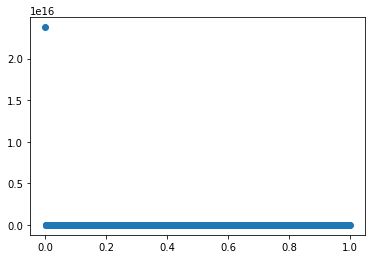

In [25]:
import matplotlib.pyplot as plt
plt.scatter(W,err)

In [27]:
rr = Ridge(alpha=0.124)
model = rr.fit(Xnew,Y)

In [28]:
Xnew.columns


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=297)

# Prepare test data and final predictions

In [29]:
xtest = preprocessing(test)


In [30]:
r = ['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'GarageQual_Ex', 'PoolQC_Fa', 'MiscFeature_TenC']


In [31]:
for i in r:
    xtest[i]=0

In [32]:
xfinal = xtest[Xnew.columns]


In [33]:
pred_final = model.predict(xfinal)


In [34]:
final_sub = test[["Id"]]
final_sub["SalePrice"]=pred_final

In [38]:
final_sub.to_csv("C:/users/HP/Downloads/submission.csv",index=None)
